In [1]:
# Main notebook for comparing new infections with SSI figure
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 50)
import seaborn as sns


import matplotlib.pyplot as plt
# %matplotlib widget
plt.rcParams['figure.figsize'] = (12,8)
# plt.rcParams["image.cmap"] = "Dark2"
# plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.Dark2.colors)
plt.rcParams["image.cmap"] = "tab10"
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=plt.cm.tab10.colors)
fs_label = 16
parameters = {
                'axes.labelsize': fs_label,
                'axes.titlesize': fs_label+4,
                'xtick.labelsize': fs_label,
                'ytick.labelsize': fs_label, 
                'legend.fontsize': fs_label, 
                'lines.markersize': 10,
                'lines.linewidth': 3
             }
plt.rcParams.update(parameters)
# %matplotlib widget
# plt.style.use('ggplot')
import matplotlib.colors as colors
# cmap = plt.cm.get_cmap('Dark2',len(ageGroups))
from matplotlib import cm # Colormaps

import locale
import matplotlib.dates as mdates
locale.setlocale(locale.LC_TIME,"Danish")
# ax = plt.gca()
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))
# # ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y \n %B'))

import os
# import csv
import math


from datetime import date


saveFigures = True
# saveFigures = False
print('saveFigures is set to: '+str(saveFigures))

print('Done loading packages')

def rnMean(data,meanWidth):
    return np.convolve(data, np.ones(meanWidth)/meanWidth, mode='valid')
def rnTime(t,meanWidth):
    return t[math.floor(meanWidth/2):-math.ceil(meanWidth/2)+1]

saveFigures is set to: True
Done loading packages


In [2]:
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"\\" + ssidatapath



for subdir, dirs, files in os.walk(rootdir):
    if not len(files) == 0:
        latestdir = subdir
        latestDate = pd.to_datetime(subdir[-10:])
        curdf = pd.read_csv(latestdir+'\\Cases_by_age.csv',delimiter = ';',dtype=str)
        
# for subdir, dirs, files in os.walk(rootdir):
#     if not len(files) == 0:
#         latestdir = subdir
#         latestDate = pd.to_datetime(subdir[-10:])
#         curdf = pd.read_csv(latestdir+'\\Cases_by_age.csv',delimiter = ';',dtype=str)
        
# list(os.walk(rootdir))[-1][0]

curdf = pd.read_csv(latestdir+'\\Test_pos_over_time.csv',delimiter = ';',dtype=str)
# curdf

In [21]:

# for subdir, dirs, files in os.walk(rootdir):
#     print(len(files))


3

In [14]:
curdf = curdf.iloc[:-2]
# curdf['NewPositive'] = pd.to_numeric(curdf['NewPositive'])
curdf['NewPositive'] = pd.to_numeric(curdf['NewPositive'].astype(str).apply(lambda x: x.replace('.','')))
curdf['Tested'] = pd.to_numeric(curdf['Tested'].astype(str).apply(lambda x: x.replace('.','')))
curdf['PosPct'] = pd.to_numeric(curdf['PosPct'].astype(str).apply(lambda x: x.replace(',','.')))
curdf['Date'] = pd.to_datetime(curdf['Date'])

testDates =  pd.to_datetime(curdf.Date,format='%Y-%m-%d')
# curdf

In [22]:

# yesterdayDate = latestDate-np.timedelta64(1,'D')
yesterdayDate = pd.to_datetime(list(os.walk(rootdir))[-2][0][-10:])

yesterdayFile = rootdir+f'\\SSI_data_{yesterdayDate:%Y-%m-%d}\\Cases_by_age.csv'
todayFile = rootdir+f'\\SSI_data_{latestDate:%Y-%m-%d}\\Cases_by_age.csv'

yesterdaySumDF = pd.read_csv(yesterdayFile,delimiter = ';',dtype=str)
todaySumDF = pd.read_csv(todayFile,delimiter = ';',dtype=str)
yesterdayCount = int(yesterdaySumDF.iloc[-1,1].replace('.',''))
yesterdayCount
todayCount = int(todaySumDF.iloc[-1,1].replace('.',''))
todayCount

numDaysPast = int((latestDate - yesterdayDate )/(np.timedelta64(1,'D')))

last24Hours = (todayCount-yesterdayCount)/numDaysPast
# last24Hours = (todayCount-yesterdayCount)

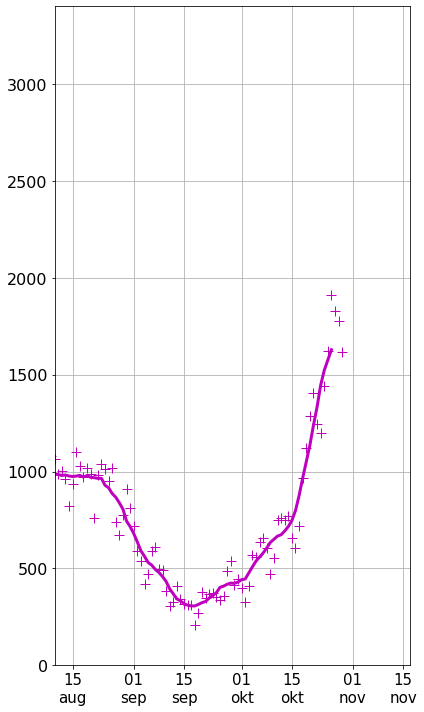

In [23]:

fig,ax1 = plt.subplots(figsize=(6,10))
meanWidth = 7
ax1.plot(curdf.Date,curdf.NewPositive,'m+')
ax1.plot(rnTime(curdf.Date,meanWidth),rnMean(curdf.NewPositive,meanWidth),'m')

curXTicks = [
    np.datetime64('2021-08-01'),
    np.datetime64('2021-08-15'),
    np.datetime64('2021-09-01'),
    np.datetime64('2021-09-15'),
    np.datetime64('2021-10-01'),
    np.datetime64('2021-10-15'),
    np.datetime64('2021-11-01'),
    np.datetime64('2021-11-15'),
]
ax1.set_xticks(curXTicks)
plt.xticks(fontsize=15)

ax1.set_xlim([np.datetime64('2021-08-10'),np.datetime64('2021-11-17')])
ax1.set_ylim([0,3400])

ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d\n%b'))
ax1.grid()

plt.tight_layout()

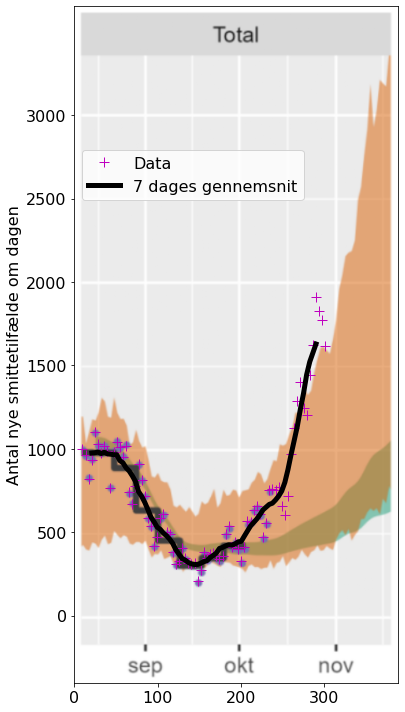

In [25]:

fig,ax1 = plt.subplots(figsize=(10,10))


import matplotlib.image as mpimg
# img = mpimg.imread('Image30032021.jpg')
img = mpimg.imread( os.getcwd()+'\\SSI_total.png')

# plt.figure()
img = np.flipud(img)
imgplot = plt.imshow(img,origin='lower')


# Manual readoff of values
y0 = 80 # 0
y1 = 280 # 1000
# x0 = 90 # 1 sept
# xEnd = 200 # 1 okt
x0 = 10 
# xEnd = 290 
xEnd = 122

divRatio = (y1-y0)/1000
xMult = (xEnd-x0)/30

firstDate = np.datetime64('2021-08-12')
lastDate = np.datetime64('2021-11-22')

indexToUse = curdf.Date >= firstDate
dataToUse = curdf.NewPositive[indexToUse].values

# xFinal = 290
# xToUse = np.linspace(x0,xEnd,len(dataToUse))
xToUse =np.arange(0,len(dataToUse))
xToShow = xMult*xToUse+x0


dataToPlot = (divRatio*dataToUse) + y0

meanWidth = 7
ax1.plot(xToShow,dataToPlot,'m+',markersize=10,label='Data')

# ax1.plot(xToShow[-1]+(xToShow[-1]-xToShow[-2]),divRatio*last24Hours+y0,'m*',label='Seneste 24 timer\n(Ikke nøjagtigt)')
ax1.plot(rnTime(xToShow,meanWidth),rnMean(dataToPlot,meanWidth),'k',linewidth=5,label=f'{meanWidth} dages gennemsnit')

# ax1.set_xticks([])
ax1.set_yticks([])

yTicksToUse = np.arange(0,3500,500)
yTicksToShow = divRatio*yTicksToUse + y0
ax1.set_yticks(yTicksToShow)
ax1.set_yticklabels(yTicksToUse)


# numDays = int((lastDate-firstDate)/np.timedelta64(1,'D'))
# xTicksToUse = np.arange(0,numDays,14) 


# ax1.legend(loc='center left')
ax1.legend(loc='upper left',bbox_to_anchor=(0,0.8,0,0))

ax1.set_ylabel('Antal nye smittetilfælde om dagen')

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/SSI_prediction_comparisonWithNewData')

# Hospital admissions

In [26]:
ssidatapath = "ssi_data"
rootdir = os.getcwd() +"\\" + ssidatapath


for subdir, dirs, files in os.walk(rootdir):
    if not len(files) == 0:
        latestdir = subdir
        latestDate = pd.to_datetime(subdir[-10:])
        # curdf = pd.read_csv(latestdir+'\\Cases_by_age.csv',delimiter = ';',dtype=str)
        
admdf = pd.read_csv(latestdir+'\\Newly_admitted_over_time.csv',delimiter = ';',dtype=str)
# curdf

In [27]:
admdf['Dato'] = pd.to_datetime(admdf['Dato'])
admdf['Total'] = pd.to_numeric(admdf['Total'])
admdf

,Dato,Hovedstaden,Sjælland,Syddanmark,Midtjylland,Nordjylland,Ukendt Region,Total
0,2020-03-01,1,0,0,0,0,0,1
1,2020-03-02,0,0,0,0,0,0,0
2,2020-03-03,1,0,0,0,0,0,1
3,2020-03-04,0,0,0,0,0,0,0
4,2020-03-05,1,0,0,0,0,0,1
5,2020-03-06,3,1,0,0,0,0,4
6,2020-03-07,0,0,0,0,0,0,0
7,2020-03-08,3,0,0,0,0,0,3
8,2020-03-09,3,6,0,0,0,0,9
9,2020-03-10,6,5,1,3,0,0,15


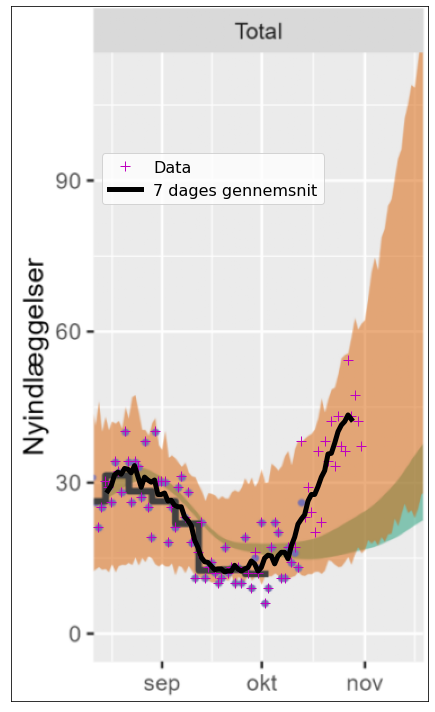

In [28]:

fig,ax1 = plt.subplots(figsize=(10,10))


import matplotlib.image as mpimg
# img = mpimg.imread('Image30032021.jpg')
img = mpimg.imread( os.getcwd()+'\\SSI_adm.png')

# plt.figure()
img = np.flipud(img)
imgplot = plt.imshow(img,origin='lower')


# Manual readoff of values
y0 = 60 # 0
y1 = 330 # 1000
# x0 = 90 # 1 sept
# xEnd = 200 # 1 okt
x0 = 77
# xEnd = 290 
xEnd = 166

divRatio = (y1-y0)/60
xMult = (xEnd-x0)/30

firstDate = np.datetime64('2021-08-13')
lastDate = np.datetime64('2021-11-22')

indexToUse = admdf.Dato >= firstDate
dataToUse = admdf.Total[indexToUse].values

# xFinal = 290
# xToUse = np.linspace(x0,xEnd,len(dataToUse))
xToUse =np.arange(0,len(dataToUse))
xToShow = xMult*xToUse+x0


dataToPlot = (divRatio*dataToUse) + y0

meanWidth = 7
ax1.plot(xToShow,dataToPlot,'m+',markersize=10,label='Data')

# ax1.plot(xToShow[-1]+(xToShow[-1]-xToShow[-2]),divRatio*last24Hours+y0,'m*',label='Seneste 24 timer\n(Ikke nøjagtigt)')
ax1.plot(rnTime(xToShow,meanWidth),rnMean(dataToPlot,meanWidth),'k',linewidth=5,label=f'{meanWidth} dages gennemsnit')

ax1.set_xticks([])
ax1.set_yticks([])

# yTicksToUse = np.arange(0,3500,500)
# yTicksToShow = divRatio*yTicksToUse + y0
# ax1.set_yticks(yTicksToShow)
# ax1.set_yticklabels(yTicksToUse)


# numDays = int((lastDate-firstDate)/np.timedelta64(1,'D'))
# xTicksToUse = np.arange(0,numDays,14) 


# ax1.legend(loc='center left')
ax1.legend(loc='upper left',bbox_to_anchor=(0.2,0.8,0,0))

# ax1.set_ylabel('Antal nyindlæggelser om dagen')

plt.tight_layout()

if saveFigures:
    plt.savefig('figs/SSI_prediction_comparisonWithNewData_admissions')